In [ ]:
#Importing libraries
import os
import librosa
import pandas as pd
import matplotlib.pyplot as pltµ
import seaborn as sns
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Defining the base path
base_path = "/content/drive/MyDrive/PFA/"

In [ ]:
# Defining the path to the audio files
audio_files_path = base_path + "wav/"  #The folder containing all audio files
audio_files = [os.path.join(audio_files_path, f) for f in os.listdir(audio_files_path) if f.endswith('.wav')]
                                                                                          #this is for filtering only the .wav file

Fichier: 03a02Nc.wav -> Locuteur ID: 03
Fichier: 03b03Tc.wav -> Locuteur ID: 03
Fichier: 03a05Wb.wav -> Locuteur ID: 03
Fichier: 03a05Aa.wav -> Locuteur ID: 03
Fichier: 03b10Wc.wav -> Locuteur ID: 03
Fichier: 03a04Ad.wav -> Locuteur ID: 03
Fichier: 03a04Ta.wav -> Locuteur ID: 03
Fichier: 03a01Wa.wav -> Locuteur ID: 03
Fichier: 03a07Fb.wav -> Locuteur ID: 03
Fichier: 03a04Nc.wav -> Locuteur ID: 03
Fichier: 03b01Td.wav -> Locuteur ID: 03
Fichier: 03b01Lb.wav -> Locuteur ID: 03
Fichier: 03b09Tc.wav -> Locuteur ID: 03
Fichier: 03a01Nc.wav -> Locuteur ID: 03
Fichier: 03a07La.wav -> Locuteur ID: 03
Fichier: 03a04Wc.wav -> Locuteur ID: 03
Fichier: 03b09La.wav -> Locuteur ID: 03
Fichier: 03b02Tb.wav -> Locuteur ID: 03
Fichier: 03a04Fd.wav -> Locuteur ID: 03
Fichier: 03a05Tc.wav -> Locuteur ID: 03
Fichier: 03b01Nb.wav -> Locuteur ID: 03
Fichier: 03b01Wc.wav -> Locuteur ID: 03
Fichier: 03b10Na.wav -> Locuteur ID: 03
Fichier: 03a07Fa.wav -> Locuteur ID: 03
Fichier: 03b01Wa.wav -> Locuteur ID: 03


<Figure size 1000x600 with 0 Axes>

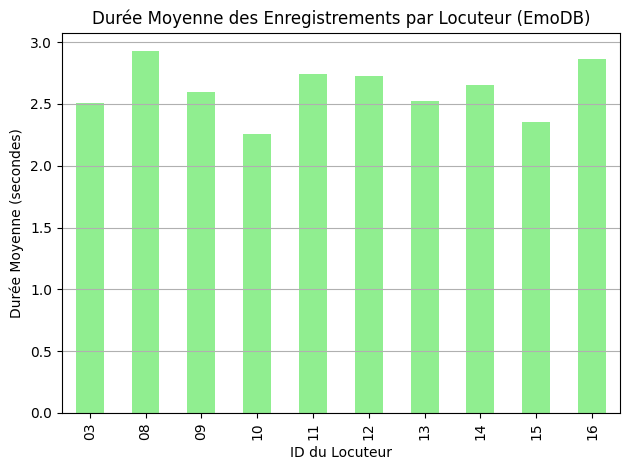

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import pandas as pd


# Vérifie les fichiers
audio_files = [f for f in os.listdir(audio_files_path) if f.endswith('.wav')]

speaker_durations = {}

for file in audio_files:
    # 🛠️ Extraction de l'ID du locuteur
    speaker_id = file[:2]  # Normalement les 2 premiers caractères = ID

    print(f"Fichier: {file} -> Locuteur ID: {speaker_id}")  # Debug

    file_path = os.path.join(audio_files_path, file)
    y, sr = librosa.load(file_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    if speaker_id not in speaker_durations:
        speaker_durations[speaker_id] = []

    speaker_durations[speaker_id].append(duration)

# Moyenne par locuteur
speaker_avg_duration = {spk: sum(durs)/len(durs) for spk, durs in speaker_durations.items()}

# Visualisation
df = pd.DataFrame.from_dict(speaker_avg_duration, orient='index', columns=['Durée Moyenne (s)'])
df = df.sort_index()

plt.figure(figsize=(10, 6))
df.plot(kind='bar', legend=False, color='lightgreen')
plt.title("Durée Moyenne des Enregistrements par Locuteur (EmoDB)")
plt.xlabel("ID du Locuteur")
plt.ylabel("Durée Moyenne (secondes)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Extracting MFCCs features for The speakers having more than 50 audio files**

In [ ]:
# Set minimum number of samples per speaker
min_samples = 50

# Dictionary to store speaker audio files
speaker_files = {}

# Group audio files by speaker
for file in audio_files:
    speaker_id = os.path.basename(file)[:2]  # Extract speaker ID (adjust based on filename format)
    if speaker_id not in speaker_files:
        speaker_files[speaker_id] = []
    speaker_files[speaker_id].append(file)

# Keep only speakers with at least `min_samples` audios
filtered_speaker_files = {spk: files for spk, files in speaker_files.items() if len(files) >= min_samples}

print(f"🔹 Keeping {len(filtered_speaker_files)} speakers who have at least {min_samples} audios.")

# Extract MFCCs for the selected speakers
mfcc_features = []
speaker_labels = []

for speaker_id, files in filtered_speaker_files.items():
    for file in files:
        y, sr = librosa.load(file, sr=None)  # Load audio
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCCs

        # Option 1: Take mean across time (simplifies model, but loses temporal info)
        mfcc_mean = np.mean(mfcc, axis=1)

        mfcc_features.append(mfcc_mean)
        speaker_labels.append(speaker_id)

# Convert to DataFrame with column names
mfcc_columns = [f"mfcc_{i+1}" for i in range(13)]  # Create column names mfcc_1, mfcc_2, ..., mfcc_13
df_mfcc = pd.DataFrame(mfcc_features, columns=mfcc_columns)
df_mfcc['speaker_id'] = speaker_labels  # Add speaker labels column

# Save the dataset
mfcc_dataset_path = os.path.join(base_path, "mfcc_dataset.csv")
df_mfcc.to_csv(mfcc_dataset_path, index=False)

print(f"✅ MFCC dataset saved at: {mfcc_dataset_path}")
print(f"Dataset shape: {df_mfcc.shape}")
print(df_mfcc.head())  # Show first few rows

🔹 Keeping 6 speakers who have at least 50 audios.
✅ MFCC dataset saved at: /content/drive/MyDrive/PFA/mfcc_dataset.csv
Dataset shape: (370, 14)
       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0 -216.130951  63.072964 -13.866072  21.093227 -10.239571 -10.953971   
1 -268.543884  82.550621  24.776773  24.086393  11.149140  18.118517   
2 -183.743301  86.286575  27.945257  22.091751   8.864712  -1.626185   
3 -179.319855  36.394558   8.384436  27.962074  -1.941971  -7.826147   
4 -205.769531  41.927071   1.376553  22.458063  -5.805259   7.580212   

      mfcc_7     mfcc_8     mfcc_9   mfcc_10    mfcc_11   mfcc_12   mfcc_13  \
0 -17.150417 -12.330558 -11.599913 -5.376930  -5.059746 -3.213584 -8.115884   
1  -0.591069   9.595785  -2.148343  8.860565  -0.781741 -0.795077  8.892277   
2  -6.338301  -2.547002 -16.566229 -2.817532  -8.335017 -6.773234 -0.104513   
3  -9.490139   3.021948 -16.805124 -9.120379  -9.866015 -4.053544  0.241229   
4  -1.197091  -0.260292 -12.

In [ ]:
df_mfcc=pd.read_csv(base_path+'mfcc_dataset.csv')
df_mfcc.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,speaker_id
0,-216.13095,63.072964,-13.866072,21.093227,-10.239571,-10.953971,-17.150417,-12.330558,-11.599913,-5.376930,-5.059746,-3.213584,-8.115884,8
1,-268.54388,82.550620,24.776773,24.086393,11.149140,18.118517,-0.591069,9.595785,-2.148343,8.860565,-0.781741,-0.795077,8.892277,8
2,-183.74330,86.286575,27.945257,22.091751,8.864712,-1.626185,-6.338301,-2.547002,-16.566229,-2.817532,-8.335017,-6.773234,-0.104513,8
3,-179.31985,36.394558,8.384436,27.962074,-1.941971,-7.826147,-9.490139,3.021948,-16.805124,-9.120379,-9.866015,-4.053544,0.241229,8
4,-205.76953,41.927070,1.376553,22.458063,-5.805259,7.580212,-1.197091,-0.260292,-12.354492,-5.962778,-10.881173,-7.197841,-1.776041,8


In [ ]:
# splitting features and labels
X = df_mfcc.drop(columns=["speaker_id"])  # all columns except the Speaker ID
y = df_mfcc["speaker_id"]  # Speaker ID as label

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting with Startification (for balanced classes)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

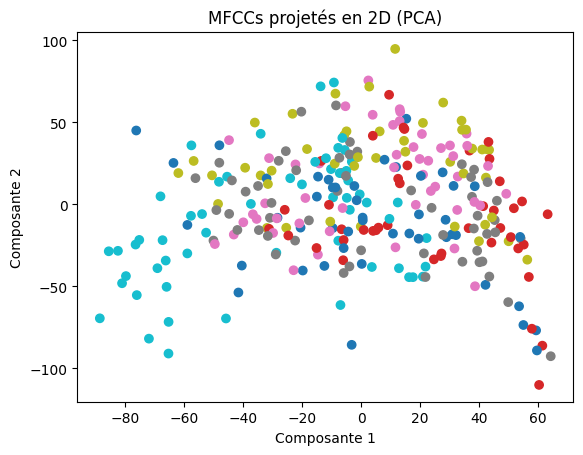

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# mfcc_features : shape (n_frames, n_mfcc)
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(X_train)

plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=y_train, cmap='tab10')

plt.title("MFCCs projetés en 2D (PCA)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()


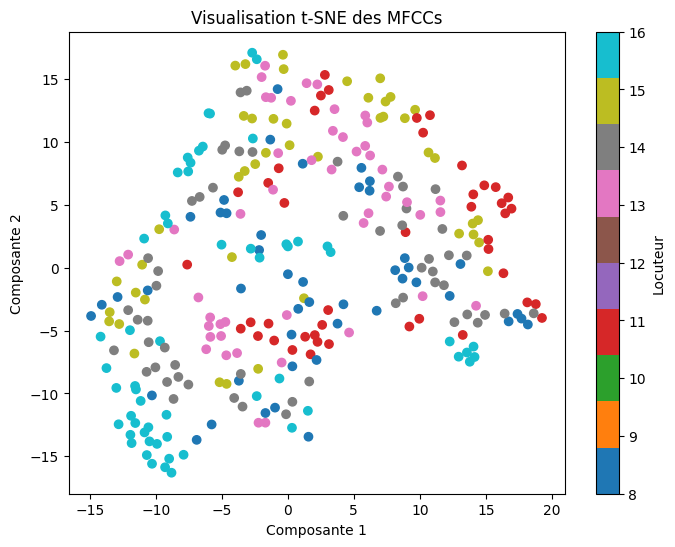

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
mfcc_tsne = tsne.fit_transform(X_train)  # X_train shape: (n_samples, n_features)

plt.figure(figsize=(8,6))
plt.scatter(mfcc_tsne[:, 0], mfcc_tsne[:, 1], c=y_train, cmap='tab10')
plt.title("Visualisation t-SNE des MFCCs")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.colorbar(label='Locuteur')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


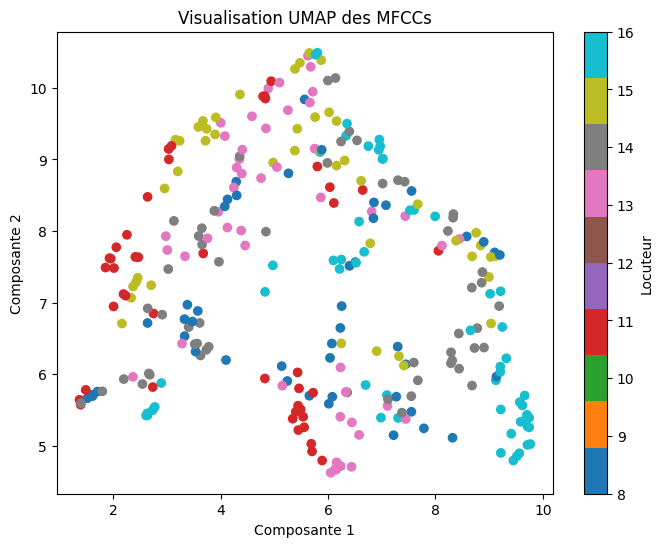

In [ ]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
mfcc_umap = reducer.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(mfcc_umap[:, 0], mfcc_umap[:, 1], c=y_train, cmap='tab10')
plt.title("Visualisation UMAP des MFCCs")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.colorbar(label='Locuteur')
plt.show()


<ipython-input-15-6dd263c0c492>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10')(np.linspace(0, 1, gmm.n_components))  # 1 couleur par composante


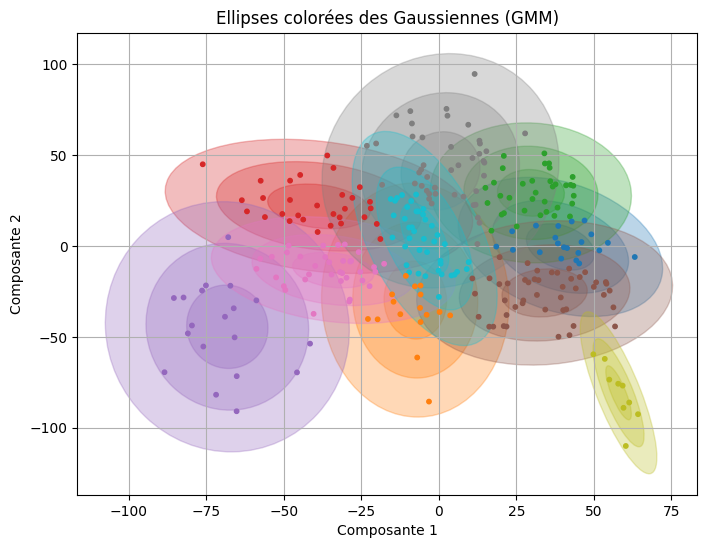

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.cm as cm

# 1. GMM sur les données 2D
gmm = GaussianMixture(n_components=10, covariance_type='full')
gmm.fit(mfcc_pca)

# 2. Couleurs pour les clusters
colors = cm.get_cmap('tab10')(np.linspace(0, 1, gmm.n_components))  # 1 couleur par composante

# 3. Fonction pour dessiner les ellipses
def draw_colored_ellipse(mean, cov, color, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    v, w = np.linalg.eigh(cov)  # décomposition pour trouver orientation
    angle = np.degrees(np.arctan2(w[1, 0], w[0, 0]))
    width, height = 2 * np.sqrt(v)

    for nsig in range(1, 4):  # pour 1, 2, 3 sigmas
        ell = Ellipse(xy=mean, width=nsig * width, height=nsig * height,
                      angle=angle, color=color, alpha=0.3)
        ax.add_patch(ell)

# 4. Fonction pour tracer les données + ellipses colorées
def plot_colored_gmm(gmm, X):
    plt.figure(figsize=(8, 6))

    # Couleurs des prédictions
    labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10, zorder=2)

    # Dessin des ellipses
    for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
        draw_colored_ellipse(mean, cov, color=colors[i])

    plt.title("Ellipses colorées des Gaussiennes (GMM)")
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.grid(True)
    plt.show()

# 5. Appel de la fonction
plot_colored_gmm(gmm, mfcc_pca)


In [ ]:
unique_speakers = np.unique(y_train)

In [ ]:
# Function to find the best n_components using BIC
def select_best_n_components(X, max_components=10):
    bic_scores = []
    components_range = range(1, max_components + 1)

    for n in components_range:
        gmm = GaussianMixture(n_components=n, covariance_type='diag', max_iter=200, random_state=42)
        gmm.fit(X)                                  # the covariance_type='diag' param means that the model assumes the features are uncorrelated and only considers the variances of each feature.
        bic_scores.append(gmm.bic(X))               #the max_iter means that the algorithm will perform up to 200 iterations to converge to a solution. If the algorithm converges before reaching 200 iterations, it will stop earlier.

    best_n_bic = components_range[np.argmin(bic_scores)]
    return best_n_bic

In [ ]:
import pickle #The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
from sklearn.mixture import GaussianMixture
# Dictionary to store trained GMM models for each speaker
gmm_models_mfcc = {}

# Get unique speaker labels
unique_speakers = np.unique(y_train)

# Training a GMM for each speaker with optimized n_components
for speaker_id in unique_speakers:
    print(f"🔹 Training GMM for Speaker {speaker_id}...")

    # Collecting all feature vectors for this speaker
    speaker_features = X_train[y_train == speaker_id].values

    # Selecting best number of components using the function build previously
    best_n = select_best_n_components(speaker_features, max_components=10)
    print(f"🔹 Optimal n_components for Speaker {speaker_id}: {best_n}")

    # Training GMM with the best n_components
    gmm = GaussianMixture(n_components=best_n, covariance_type='diag', max_iter=200, random_state=42)
    gmm.fit(speaker_features)

    # Storing the trained model
    gmm_models_mfcc[speaker_id] = gmm

# Save the trained GMM models for future use so we don't have to retrain it everytime
gmm_path = "/content/drive/MyDrive/PFA/gmm_models_mfcc.pkl"
with open(gmm_path, 'wb') as f:
    pickle.dump(gmm_models_mfcc, f)

print("✅ GMM Models trained with optimal n_components and saved successfully!")


🔹 Training GMM for Speaker 8...
🔹 Optimal n_components for Speaker 8: 3
🔹 Training GMM for Speaker 11...
🔹 Optimal n_components for Speaker 11: 2
🔹 Training GMM for Speaker 13...
🔹 Optimal n_components for Speaker 13: 2
🔹 Training GMM for Speaker 14...
🔹 Optimal n_components for Speaker 14: 2
🔹 Training GMM for Speaker 15...
🔹 Optimal n_components for Speaker 15: 3
🔹 Training GMM for Speaker 16...
🔹 Optimal n_components for Speaker 16: 3
✅ GMM Models trained with optimal n_components and saved successfully!


In [ ]:
def predict_speaker(feature_vector, gmm_models):
    """
    Predicts the speaker given the extracted features.

    Args:
        feature_vector (numpy array): Extracted features from the test sample.
        gmm_models (dict): Dictionary of trained GMM models for each speaker.

    Returns:
        str: The predicted speaker ID.
    """
    log_likelihoods = {speaker: gmm.score(feature_vector.reshape(1, -1)) for speaker, gmm in gmm_models.items()}
    return max(log_likelihoods, key=log_likelihoods.get)
#.reshape(1, -1) ensures that the model gets a 2D array, as expected by GMM.score().

In [ ]:
correct_predictions = 0
gmm_models_path = base_path + 'gmm_models_mfcc/'
for i in range(len(X_test)):
    feature_vector = X_test.iloc[i]  # Extracted features from test sample
    true_speaker = y_test.iloc[i]  # True speaker label
    predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_mfcc) #GMM needs the input to be in 2D format for example like this [[0.5, 1.2, 0.8]] and not this [0.5, 1.2, 0.8]

    if predicted_speaker == true_speaker:
        correct_predictions += 1

# Calculate and print accuracy
accuracy = correct_predictions / len(X_test) * 100
print(f"🔹 GMM Test Accuracy: {accuracy:.2f}%")


🔹 GMM Test Accuracy: 77.03%


In [ ]:
len(X_test)

74

In [ ]:
# Choose a test sample
sample_index = 42 # a random index of the test sample to check the prediction
feature_vector = X_test.iloc[sample_index]

# Predict the speaker for this sample
predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_mfcc)

# Display the prediction
print(f"Predicted speaker for sample {sample_index}: {predicted_speaker}")

# Optionally, display the true speaker label
true_speaker = y_test.iloc[sample_index] # Get the true speaker label
print(f"True speaker for sample {sample_index}: {true_speaker}")


Predicted speaker for sample 42: 11
True speaker for sample 42: 11


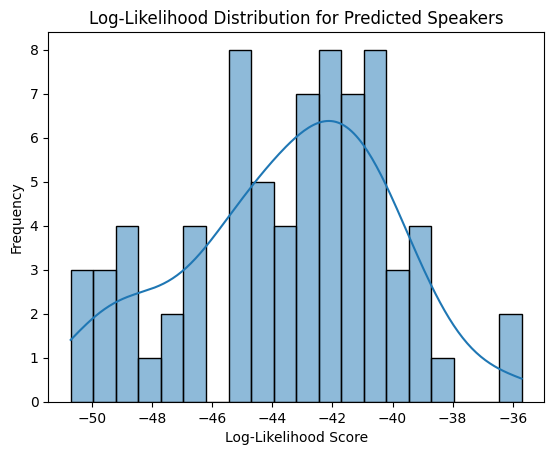

In [ ]:
import seaborn as sns

log_likelihoods = [gmm_models_mfcc[predict_speaker(X_test.iloc[i].values.reshape(1, -1), gmm_models_mfcc)].score(X_test.iloc[i].values.reshape(1, -1))
                   for i in range(len(X_test))]

sns.histplot(log_likelihoods, kde=True, bins=20)
plt.xlabel("Log-Likelihood Score")
plt.ylabel("Frequency")
plt.title("Log-Likelihood Distribution for Predicted Speakers")
plt.show()


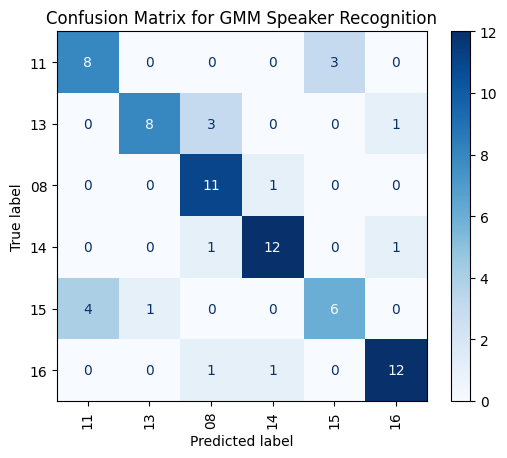

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect true and predicted speaker labels
true_labels = [y_test.iloc[i] for i in range(len(X_test))]
predicted_labels = [predict_speaker(X_test.iloc[i].values.reshape(1, -1), gmm_models_mfcc) for i in range(len(X_test))]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=list(set(true_labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_labels)))
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix for GMM Speaker Recognition")
plt.show()


In [ ]:
# Compute per-speaker accuracy
per_speaker_accuracy = cm.diagonal() / cm.sum(axis=1)

# Get unique speaker labels
speaker_labels = np.unique(y_test)  # Extract unique speakers from test labels

# Convert to a readable format
accuracy_df = pd.DataFrame({'Speaker': speaker_labels, 'Accuracy': per_speaker_accuracy})

# Display the results
print("🔹 Per-Speaker Accuracy:")
print(accuracy_df.sort_values(by="Accuracy", ascending=False))  # Sorted for better readability


🔹 Per-Speaker Accuracy:
  Speaker  Accuracy
2      13  0.916667
3      14  0.857143
5      16  0.857143
0      08  0.727273
1      11  0.666667
4      15  0.545455


In [ ]:
speakers = df_mfcc['speaker_id'].unique()
print(speakers)


['08' '11' '13' '14' '15' '16']


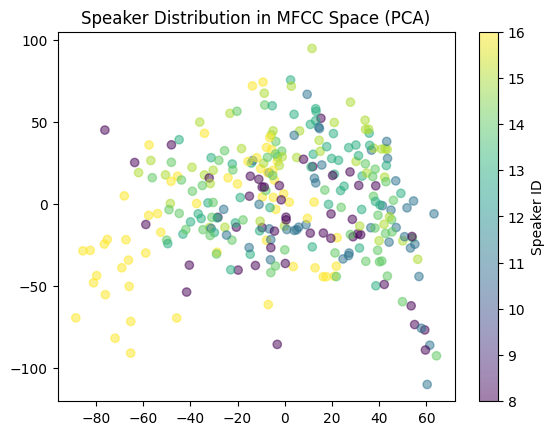

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)  # Reduce MFCCs to 2D

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label="Speaker ID")
plt.title("Speaker Distribution in MFCC Space (PCA)")
plt.show()


 Overlapping between colors = Speakers have similar MFCC features → This may cause misclassification in GMM.

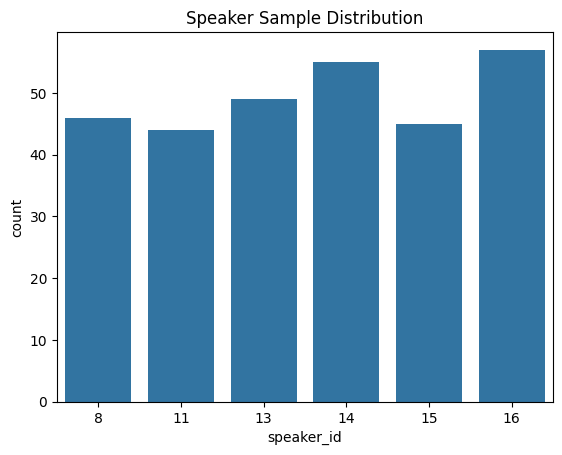

In [ ]:
import seaborn as sns
sns.countplot(x=y_train)
plt.title("Speaker Sample Distribution")
plt.show()


In [ ]:
def select_best_n_components_full(X, max_components=10, cov_type='diag'):
    bic_scores = []
    components_range = range(1, max_components + 1)

    for n in components_range:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, max_iter=200, random_state=42)
        gmm.fit(X)
        bic_scores.append(gmm.bic(X))

    best_n_bic = components_range[np.argmin(bic_scores)]
    return best_n_bic


In [ ]:
df_mfcc=pd.read_csv(base_path+'mfcc_dataset.csv')
df_mfcc.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,speaker_id
0,-216.13095,63.072964,-13.866072,21.093227,-10.239571,-10.953971,-17.150417,-12.330558,-11.599913,-5.376930,-5.059746,-3.213584,-8.115884,8
1,-268.54388,82.550620,24.776773,24.086393,11.149140,18.118517,-0.591069,9.595785,-2.148343,8.860565,-0.781741,-0.795077,8.892277,8
2,-183.74330,86.286575,27.945257,22.091751,8.864712,-1.626185,-6.338301,-2.547002,-16.566229,-2.817532,-8.335017,-6.773234,-0.104513,8
3,-179.31985,36.394558,8.384436,27.962074,-1.941971,-7.826147,-9.490139,3.021948,-16.805124,-9.120379,-9.866015,-4.053544,0.241229,8
4,-205.76953,41.927070,1.376553,22.458063,-5.805259,7.580212,-1.197091,-0.260292,-12.354492,-5.962778,-10.881173,-7.197841,-1.776041,8


In [ ]:
# splitting features and labels
X = df_mfcc.drop(columns=["speaker_id"])  # all columns except the Speaker IDµ
y = df_mfcc["speaker_id"]  # Speaker ID as label

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting with Startification (for balanced classes)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import pickle #The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
from sklearn.mixture import GaussianMixture
# Dictionary to store trained GMM models for each speaker
gmm_models_log = {}

# Get unique speaker labels
unique_speakers = np.unique(y_train)

# Training a GMM for each speaker with optimized n_components
for speaker_id in unique_speakers:
    print(f"🔹 Training GMM for Speaker {speaker_id}...")

    # Collecting all feature vectors for this speaker
    speaker_features = X_train[y_train == speaker_id].values

    # Selecting best number of components using the function build previously
    best_n = select_best_n_components_full(speaker_features, max_components=15)
    print(f"🔹 Optimal n_components for Speaker {speaker_id}: {best_n}")

    # Training GMM with the best n_components
    gmm = GaussianMixture(n_components=best_n, covariance_type='full', max_iter=500, random_state=42)
    gmm.fit(speaker_features)

    # Storing the trained model
    gmm_models_log[speaker_id] = gmm

# Save the trained GMM models for future use so we don't have to retrain it everytime
gmm_path = "/content/drive/MyDrive/PFA/gmm_models_log.pkl"
with open(gmm_path, 'wb') as f:
    pickle.dump(gmm_models_log, f)

print("✅ GMM Models trained with optimal n_components and saved successfully!")


🔹 Training GMM for Speaker 8...
🔹 Optimal n_components for Speaker 8: 11
🔹 Training GMM for Speaker 11...
🔹 Optimal n_components for Speaker 11: 11
🔹 Training GMM for Speaker 13...
🔹 Optimal n_components for Speaker 13: 12
🔹 Training GMM for Speaker 14...
🔹 Optimal n_components for Speaker 14: 11
🔹 Training GMM for Speaker 15...
🔹 Optimal n_components for Speaker 15: 9
🔹 Training GMM for Speaker 16...
🔹 Optimal n_components for Speaker 16: 9
✅ GMM Models trained with optimal n_components and saved successfully!


In [ ]:
correct_predictions = 0

for i in range(len(X_test)):
    feature_vector = X_test.iloc[i]  # Extracted features from test sample
    true_speaker = y_test.iloc[i]  # True speaker label
    predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_log) #GMM needs the input to be in 2D format for example like this [[0.5, 1.2, 0.8]] and not this [0.5, 1.2, 0.8]

    if predicted_speaker == true_speaker:
        correct_predictions += 1

# Calculate and print accuracy
accuracy = correct_predictions / len(X_test) * 100
print(f"🔹 GMM Test Accuracy: {accuracy:.2f}%")


🔹 GMM Test Accuracy: 50.00%


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# **2. Normaliser les MFCCs avec StandardScaler**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_mfcc.iloc[:, :-1])  # Normaliser uniquement les MFCCs (sans speaker_id)

# Remettre sous forme de DataFrame en gardant les noms des colonnes MFCC
df_mfcc_scaled = pd.DataFrame(X_scaled, columns=df_mfcc.columns[:-1])  # Exclude 'speaker_id' column from scaling

# Réintégrer les labels (speaker_id)
df_mfcc_scaled['speaker_id'] = df_mfcc['speaker_id']  # Add speaker_id column

# **3. Sauvegarder le dataset normalisé**
mfcc_dataset_path = "/content/drive/MyDrive/PFA/mfcc_dataset_scaled.csv"
df_mfcc_scaled.to_csv(mfcc_dataset_path, index=False)

print(f"✅ MFCC dataset normalisé sauvegardé à: {mfcc_dataset_path}")
print(f"Dataset shape: {df_mfcc_scaled.shape}")
print(df_mfcc_scaled.head())  # Afficher quelques lignes


✅ MFCC dataset normalisé sauvegardé à: /content/drive/MyDrive/PFA/mfcc_dataset_scaled.csv
Dataset shape: (370, 14)
     mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
0 -0.786802  0.016517 -0.393967 -0.293692 -0.150054 -1.287247 -0.384491   
1 -2.301321  0.760499  1.379211 -0.076996  1.418264  1.293492  1.452059   
2  0.149069  0.903200  1.524601 -0.221402  1.250760 -0.459228  0.814650   
3  0.276888 -1.002510  0.627027  0.203592  0.458364 -1.009593  0.465088   
4 -0.487399 -0.791187  0.305461 -0.194882  0.175090  0.358016  1.384847   

     mfcc_8    mfcc_9   mfcc_10   mfcc_11   mfcc_12   mfcc_13  speaker_id  
0 -0.910875  0.313952 -0.625225  0.240033  0.400138 -1.270876           8  
1  2.848133  1.866530  1.793032  1.052535  0.912803  1.642053           8  
2  0.766398 -0.501849 -0.190508 -0.382025 -0.354422  0.101204           8  
3  1.721127 -0.541091 -1.261054 -0.672800  0.222086  0.160418           8  
4  1.158427  0.190000 -0.724732 -0.865605 -0.444428 -0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# **1. Split the data into training and testing sets**
X = df_mfcc_scaled.iloc[:, :-1].values  # Features (MFCCs without speaker_id)
y = df_mfcc_scaled['speaker_id'].values  # Labels (speaker_id)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.mixture import GaussianMixture
import numpy as np

def select_best_n_components(X, max_components=10, n_splits=5):
    """
    Select the best number of components for the GMM using cross-validation.

    Parameters:
    - X: The features for training (MFCCs)
    - max_components: The maximum number of components to test
    - n_splits: Number of splits for cross-validation

    Returns:
    - best_n_components: The number of components with the best cross-validation score
    """
    # Initialize K-Folds cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    best_n_components = None
    best_log_likelihood = -np.inf  # Start with very low log-likelihood

    # Loop through different numbers of components
    for n_components in range(1, max_components + 1):
        log_likelihoods = []

        # Cross-validation loop
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]

            # Create and train the GMM model
            gmm = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=42)
            gmm.fit(X_train)

            # Evaluate the model on the validation set
            log_likelihood = gmm.score(X_val)  # log-likelihood score
            log_likelihoods.append(log_likelihood)

        # Calculate the average log-likelihood for this number of components
        avg_log_likelihood = np.mean(log_likelihoods)
        print(f"n_components={n_components}: Avg Log-Likelihood = {avg_log_likelihood}")

        # Update best number of components if needed
        if avg_log_likelihood > best_log_likelihood:
            best_log_likelihood = avg_log_likelihood
            best_n_components = n_components

    print(f"Best n_components = {best_n_components} with log-likelihood = {best_log_likelihood}")
    return best_n_components


In [ ]:
import pickle #The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
from sklearn.mixture import GaussianMixture
# Dictionary to store trained GMM models for each speaker
gmm_models_normalized = {}

# Get unique speaker labels
unique_speakers = np.unique(y_train)

# Training a GMM for each speaker with optimized n_components
for speaker_id in unique_speakers:
    print(f"🔹 Training GMM for Speaker {speaker_id}...")

    # Collecting all feature vectors for this speaker
    speaker_features = X_train[y_train == speaker_id]

    # Selecting best number of components using the function build previously
    best_n = select_best_n_components(speaker_features, max_components=10)
    print(f"🔹 Optimal n_components for Speaker {speaker_id}: {best_n}")

    # Training GMM with the best n_components
    gmm = GaussianMixture(n_components=best_n, covariance_type='diag', max_iter=200, random_state=42)
    gmm.fit(speaker_features)

    # Storing the trained model
    gmm_models_normalized[speaker_id] = gmm

# Save the trained GMM models for future use so we don't have to retrain it everytime
gmm_path = "/content/drive/MyDrive/PFA/gmm_models_normalized.pkl"
with open(gmm_path, 'wb') as f:
    pickle.dump(gmm_models_normalized, f)

print("✅ GMM Models trained with optimal n_components and saved successfully!")


🔹 Training GMM for Speaker 8...
n_components=1: Avg Log-Likelihood = -17.389849927989957
n_components=2: Avg Log-Likelihood = -14.778620678571547
n_components=3: Avg Log-Likelihood = -13.637508355300909
n_components=4: Avg Log-Likelihood = -14.499627727389946
n_components=5: Avg Log-Likelihood = -15.329965806951387
n_components=6: Avg Log-Likelihood = -16.485431027117635
n_components=7: Avg Log-Likelihood = -17.901921490414498
n_components=8: Avg Log-Likelihood = -21.83404068611078
n_components=9: Avg Log-Likelihood = -23.430257000757713
n_components=10: Avg Log-Likelihood = -25.921276472472208
Best n_components = 3 with log-likelihood = -13.637508355300909
🔹 Optimal n_components for Speaker 8: 3
🔹 Training GMM for Speaker 11...
n_components=1: Avg Log-Likelihood = -16.412100724326837
n_components=2: Avg Log-Likelihood = -14.928242237739525
n_components=3: Avg Log-Likelihood = -15.380328484189608
n_components=4: Avg Log-Likelihood = -16.45261094677441
n_components=5: Avg Log-Likelihood

In [ ]:
correct_predictions = 0
gmm_models_path = '/content/drive/MyDrive/PFA/gmm_models_normalized.pkl'
for i in range(len(X_test)):
    feature_vector = X_test[i]  # Extracted features from test sample
    true_speaker = y_test[i]  # True speaker label
    predicted_speaker = predict_speaker(feature_vector.reshape(1, -1), gmm_models_normalized) #GMM needs the input to be in 2D format for example like this [[0.5, 1.2, 0.8]] and not this [0.5, 1.2, 0.8]

    if predicted_speaker == true_speaker:
        correct_predictions += 1

# Calculate and print accuracy
accuracy = correct_predictions / len(X_test) * 100
print(f"🔹 GMM Test Accuracy: {accuracy:.2f}%")


🔹 GMM Test Accuracy: 75.68%


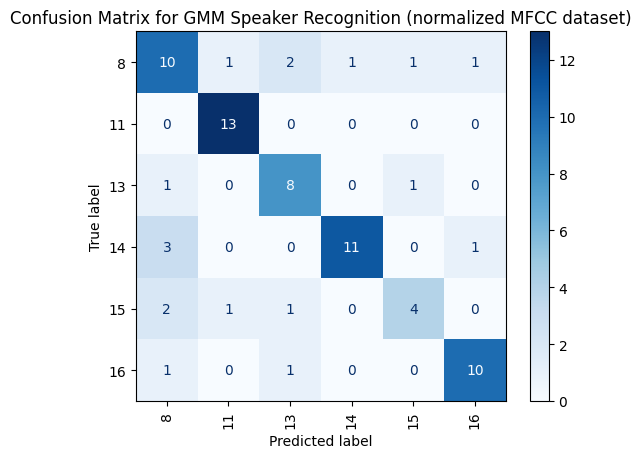

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect true and predicted speaker labels
true_labels = [y_test[i] for i in range(len(X_test))]
predicted_labels = [predict_speaker(X_test[i].reshape(1, -1), gmm_models_normalized) for i in range(len(X_test))]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=list(set(true_labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_labels)))
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix for GMM Speaker Recognition (normalized MFCC dataset)")
plt.show()


In [ ]:
# Compute per-speaker accuracy
per_speaker_accuracy = cm.diagonal() / cm.sum(axis=1)

# Get unique speaker labels
speaker_labels = np.unique(y_test)  # Extract unique speakers from test labels

# Convert to a readable format
accuracy_df = pd.DataFrame({'Speaker': speaker_labels, 'Accuracy': per_speaker_accuracy})

# Display the results
print("🔹 Per-Speaker Accuracy:")
print(accuracy_df.sort_values(by="Accuracy", ascending=False))  # Sorted for better readability


🔹 Per-Speaker Accuracy:
   Speaker  Accuracy
1       11  1.000000
5       16  0.833333
2       13  0.800000
3       14  0.733333
0        8  0.625000
4       15  0.500000
